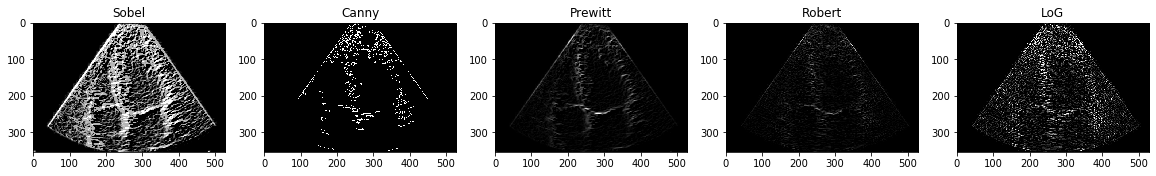

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('sonography.jpg',0)


img_gaussian = cv.GaussianBlur(img,(5,5),0)
#Sobel
sobel_x = cv.Sobel(img_gaussian,cv.CV_8U,1,0,ksize=5)
sobel_y = cv.Sobel(img_gaussian,cv.CV_8U,0,1,ksize=5)
img_sobel = np.sqrt(pow(sobel_x, 2.0) + pow(sobel_y , 2.0))

#Prewitt
kernel1_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernel1_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewitt_x = cv.filter2D(img_gaussian, -1, kernel1_x)
prewitt_y = cv.filter2D(img_gaussian, -1, kernel1_y)
img_prewitt = np.sqrt(pow(prewitt_x, 2.0) + pow(prewitt_y, 2.0))

#Canny
img_canny = cv.Canny(img,100,200)

#Robert
kernel2_x = np.array([[-1, 0], [0, 1]])
kernel2_y = np.array([[0, -1], [1, 0]])
robert_x = cv.filter2D(img, -1, kernel2_x)
robert_y = cv.filter2D(img, -1, kernel2_y)
img_robert = np.sqrt(pow(robert_x, 2.0) + pow(robert_y, 2.0))

#LoG
kernel3 = np.array([[0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]])
img_log = cv.filter2D(img, -1, kernel3)


plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.title('Sobel')
plt.imshow(img_sobel, cmap='gray')
plt.subplot(1,5,2)
plt.title('Canny')
plt.imshow(img_canny, cmap='gray')
plt.subplot(1,5,3)
plt.title('Prewitt')
plt.imshow(img_prewitt, cmap='gray')
plt.subplot(1,5,4)
plt.title('Robert')
plt.imshow(img_robert, cmap='gray')
plt.subplot(1,5,5)
plt.title('LoG')
plt.imshow(img_log, cmap='gray')
plt.show()
